In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import copy
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

# Attribution & allocation

In [2]:
subs_df = pd.read_csv('Copy of subscribers.csv')

In [3]:
subs_df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [4]:
num_conversion = subs_df.shape[0]

In [5]:
first_int = subs_df['attribution_survey'].value_counts()/num_conversion

In [6]:
first_int

facebook            0.523336
tv                  0.175304
referral            0.091737
search              0.037306
pinterest           0.034512
other               0.028538
public_radio        0.027321
social_organic      0.016997
youtube             0.013654
podcast             0.013157
affiliate           0.008619
ott                 0.006339
sirius xm           0.004929
facebook_organic    0.003361
direct_mail         0.001792
amfm_radio          0.001480
Name: attribution_survey, dtype: float64

In [7]:
last_int = subs_df['attribution_technical'].value_counts()/num_conversion

In [8]:
last_int

facebook                   0.352553
email                      0.112860
search                     0.111173
organic                    0.096706
brand sem intent google    0.081378
google_organic             0.046967
affiliate                  0.043466
email_blast                0.031969
pinterest                  0.026644
referral                   0.022712
facebook_organic           0.014374
discovery                  0.011295
brand sem intent bing      0.009801
other                      0.007846
display                    0.006181
bing                       0.005035
internal                   0.004929
podcast                    0.004327
youtube                    0.004011
bing_organic               0.001621
vod                        0.001305
ott                        0.000694
direct_mail                0.000611
quora                      0.000439
samsung                    0.000378
appstore                   0.000193
criteo                     0.000193
pinterest_organic          0

In [9]:
total_int = pd.concat([first_int, last_int], axis=1)
total_int.columns = ['first', 'last']
total_int1 = total_int.iloc[[0,3,8,23,24],:]
total_int1

,first,last
facebook,0.523336,0.352553
search,0.037306,0.111173
youtube,0.013654,0.004011
display,NaN,0.006181
bing,NaN,0.005035


Text(0.5, 1.0, 'Conversion rate')

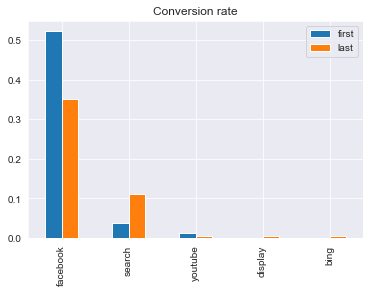

In [10]:
total_int1.plot.bar()
plt.title('Conversion rate')

In [11]:
channel_df = pd.read_csv('Copy of channel_spend_graduate.csv')
channel_df

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [12]:
# I choose Last Interaction to calculate the CAC for each channel.
facebook = channel_df.loc[channel_df['channel']=='facebook']['spend_AED'].sum()/(total_int1.iloc[0,1] * num_conversion)
bing = channel_df.loc[channel_df['channel']=='bing']['spend_AED'].sum()/(total_int1.iloc[4,1] * num_conversion)
display = channel_df.loc[channel_df['channel']=='display']['spend_AED'].sum()/(total_int1.iloc[3,1] * num_conversion)
search = channel_df.loc[channel_df['channel']=='search']['spend_AED'].sum()/(total_int1.iloc[1,1] * num_conversion)
youtube = channel_df.loc[channel_df['channel']=='youtube']['spend_AED'].sum()/(total_int1.iloc[2,1] * num_conversion)

In [13]:
data = {'Channel': ['facebook','search','youtube','display','bing'],'CAC': [facebook,search,youtube,display,bing]}
data = pd.DataFrame(data)
data.set_index(['Channel'],inplace=True)
data

,CAC
Channel,
facebook,1.414313
search,8.792381
youtube,9.561884
display,0.260128
bing,9.424084


Text(0.5, 1.0, 'CAC for each Channel')

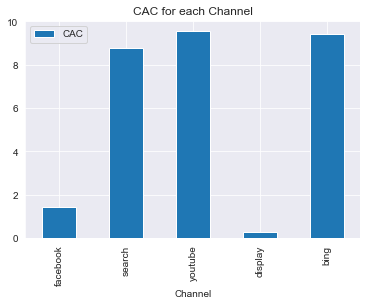

In [14]:
data.plot.bar()
plt.title('CAC for each Channel')

# Customer segmentaion

In [15]:
subs_df.isna().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

In [16]:
new_subs = pd.DataFrame(subs_df, columns=['package_type','preferred_genre','intended_use','male_TF'])
new_subs

,package_type,preferred_genre,intended_use,male_TF
0,economy,comedy,access to exclusive content,False
1,base,comedy,access to exclusive content,False
2,enhanced,regional,replace OTT,True
3,base,drama,replace OTT,False
4,base,comedy,replace OTT,False
...,...,...,...,...
227623,enhanced,comedy,supplement OTT,False
227624,enhanced,comedy,replace OTT,False
227625,base,comedy,access to exclusive content,False
227626,base,comedy,access to exclusive content,False


In [17]:
new_subs.isna().sum()

package_type       35574
preferred_genre    36326
intended_use        3549
male_TF              269
dtype: int64

In [18]:
new_subs.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,package_type,preferred_genre,intended_use,male_TF
0,economy,comedy,access to exclusive content,False
1,base,comedy,access to exclusive content,False
2,enhanced,regional,replace OTT,True
3,base,drama,replace OTT,False
4,base,comedy,replace OTT,False
...,...,...,...,...
227623,enhanced,comedy,supplement OTT,False
227624,enhanced,comedy,replace OTT,False
227625,base,comedy,access to exclusive content,False
227626,base,comedy,access to exclusive content,False


In [19]:
df_encoded = pd.get_dummies(data=new_subs, columns=['package_type','preferred_genre','intended_use','male_TF'], drop_first=True)
df_encoded

,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,0,1,0,0,0,0,0,0,0,0,0,1,0
227624,0,1,0,0,0,0,0,0,0,0,1,0,0
227625,0,0,0,0,0,0,0,0,0,0,0,0,0
227626,0,0,0,0,0,0,0,0,0,0,0,0,0


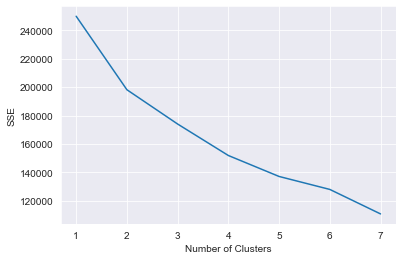

In [20]:
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 8), sse)
plt.xticks(range(1, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_encoded)

#view cluster assignments for each observation
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [22]:
new_subs['Clusters'] = kmeans.labels_
new_subs

,package_type,preferred_genre,intended_use,male_TF,Clusters
0,economy,comedy,access to exclusive content,False,0
1,base,comedy,access to exclusive content,False,0
2,enhanced,regional,replace OTT,True,1
3,base,drama,replace OTT,False,2
4,base,comedy,replace OTT,False,1
...,...,...,...,...,...
227623,enhanced,comedy,supplement OTT,False,1
227624,enhanced,comedy,replace OTT,False,1
227625,base,comedy,access to exclusive content,False,0
227626,base,comedy,access to exclusive content,False,0


Text(0.5, 1.0, 'package types for each cluster')

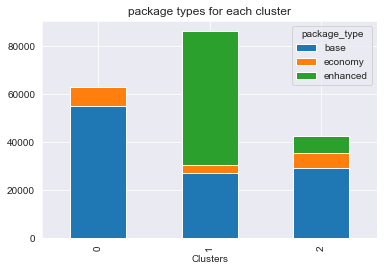

In [23]:
new_subs.groupby('Clusters')['package_type'].value_counts().unstack().plot.bar(stacked=True)
plt.title('package types for each cluster')

Text(0.5, 1.0, 'preferred genre for each cluster')

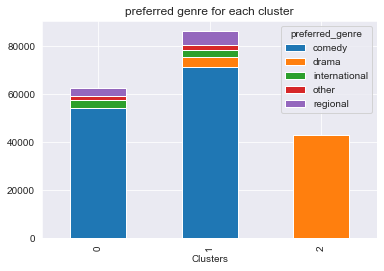

In [24]:
new_subs.groupby('Clusters')['preferred_genre'].value_counts().unstack().plot.bar(stacked=True)
plt.title('preferred genre for each cluster')

Text(0.5, 1.0, 'intended use for each cluster')

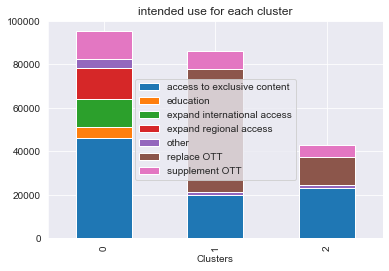

In [25]:
new_subs.groupby('Clusters')['intended_use'].value_counts().unstack().plot.bar(stacked=True).legend(loc='best')
plt.title('intended use for each cluster')

Text(0.5, 1.0, 'gender for each cluster')

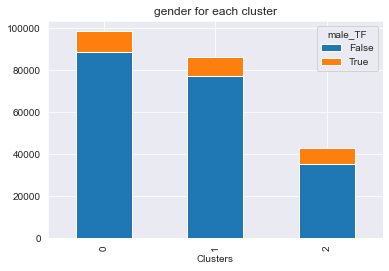

In [26]:
new_subs.groupby('Clusters')['male_TF'].value_counts().unstack().plot.bar(stacked=True)
plt.title('gender for each cluster')

In [27]:
subs_df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [31]:
new_subs1 = pd.DataFrame(subs_df, columns=['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','trial_completed'])
new_subs1 = new_subs1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
new_subs1.describe()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age
count,115332.000000,115332.000000,115332.000000,1.153320e+05
mean,3.010223,27.984598,2.061284,1.522177e+02
std,0.820330,4.815293,0.245850,2.460452e+04
min,0.000000,-32.146760,-1.000000,0.000000e+00
25%,2.000000,24.401536,2.000000,3.500000e+01
50%,3.000000,27.301448,2.000000,4.500000e+01
75%,3.000000,30.201361,2.000000,5.600000e+01
max,14.000000,76.599962,7.000000,8.061990e+06


In [35]:
scaler = MinMaxScaler()
scaler = scaler.partial_fit(new_subs1)
result = scaler.transform(new_subs1)
df1 = pd.DataFrame(result)
df1.columns = ['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','trial_completed']
df1

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,trial_completed
0,0.214286,0.626667,0.375,0.000003,1.0
1,0.285714,0.506667,0.500,0.000003,1.0
2,0.142857,0.480000,0.375,0.000008,1.0
3,0.214286,0.613333,0.375,0.000003,1.0
4,0.214286,0.560000,0.375,0.000009,0.0
...,...,...,...,...,...
115327,0.285714,0.546667,0.375,0.000005,1.0
115328,0.214286,0.573333,0.375,0.000004,1.0
115329,0.142857,0.520000,0.375,0.000005,1.0
115330,0.214286,0.560000,0.375,0.000005,1.0


In [36]:
df_train, df_test = model_selection.train_test_split(df1, test_size=0.3)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cols = ['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services'] 

X = df1[cols]
y = df1['trial_completed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.reshape(-1))
y_pred = logreg.predict(X_test)
print('test set prediction accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))


print('Train/Test split results:')
print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))

test set prediction accuracy: 0.88
Train/Test split results:
accuracy is 0.876


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4288
         1.0       0.88      1.00      0.93     30312

    accuracy                           0.88     34600
   macro avg       0.44      0.50      0.47     34600
weighted avg       0.77      0.88      0.82     34600



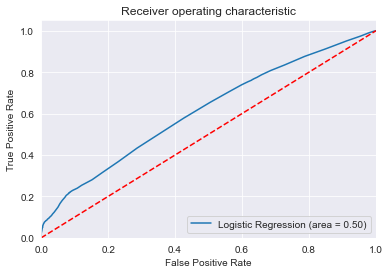

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()